Simple Linear Regression Model

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('housing.csv')

In [43]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
data.dropna(inplace=True)

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [48]:
train_data = X_train.join(y_train)

In [49]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12454,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,INLAND,58400.0
5668,-118.30,33.72,28.0,2510.0,583.0,1388.0,554.0,3.3397,NEAR OCEAN,267800.0
4313,-118.33,34.09,36.0,561.0,180.0,340.0,127.0,1.4375,<1H OCEAN,165000.0
16325,-121.33,37.98,10.0,1564.0,397.0,643.0,347.0,2.7031,INLAND,150000.0
4700,-118.38,34.07,21.0,3653.0,956.0,1510.0,890.0,3.5573,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
9687,-121.62,36.74,30.0,1337.0,253.0,838.0,247.0,5.0374,<1H OCEAN,165400.0
4105,-118.34,34.12,41.0,3257.0,679.0,1237.0,638.0,4.2415,<1H OCEAN,409600.0
16863,-122.41,37.63,35.0,865.0,226.0,602.0,217.0,3.0000,NEAR OCEAN,229100.0
8273,-118.16,33.77,29.0,3078.0,786.0,1460.0,736.0,2.8750,NEAR OCEAN,232500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

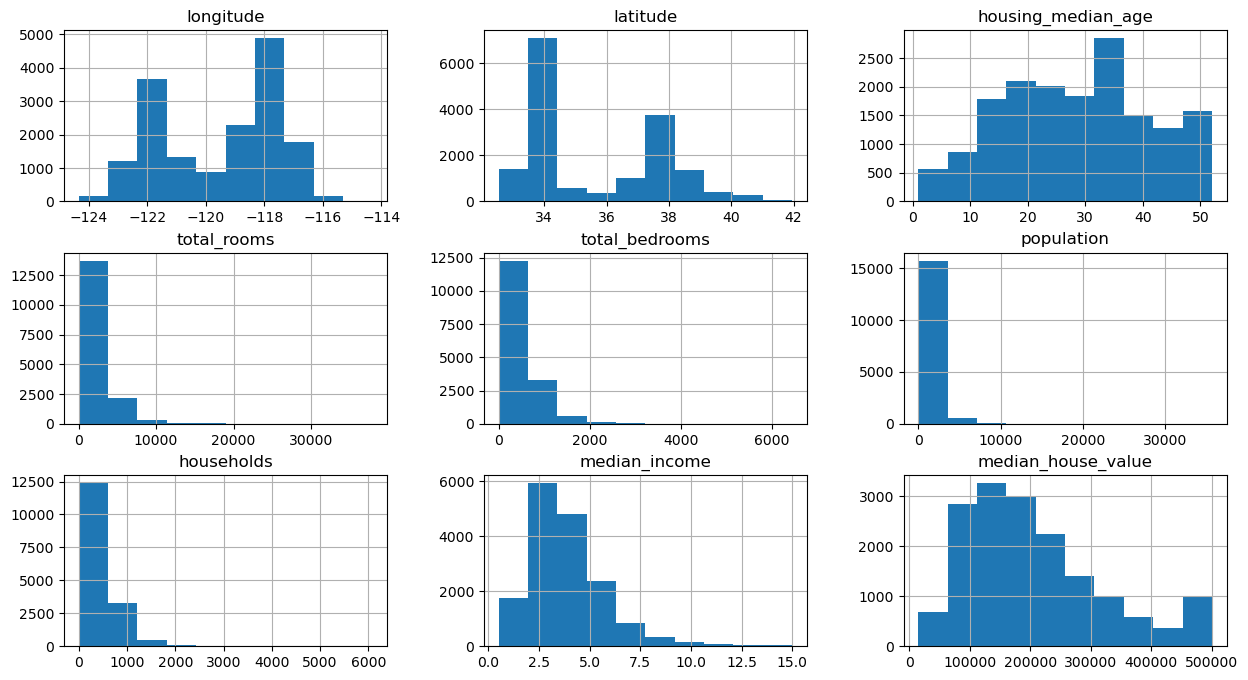

In [50]:
train_data.hist(figsize=(15,8))

<Axes: >

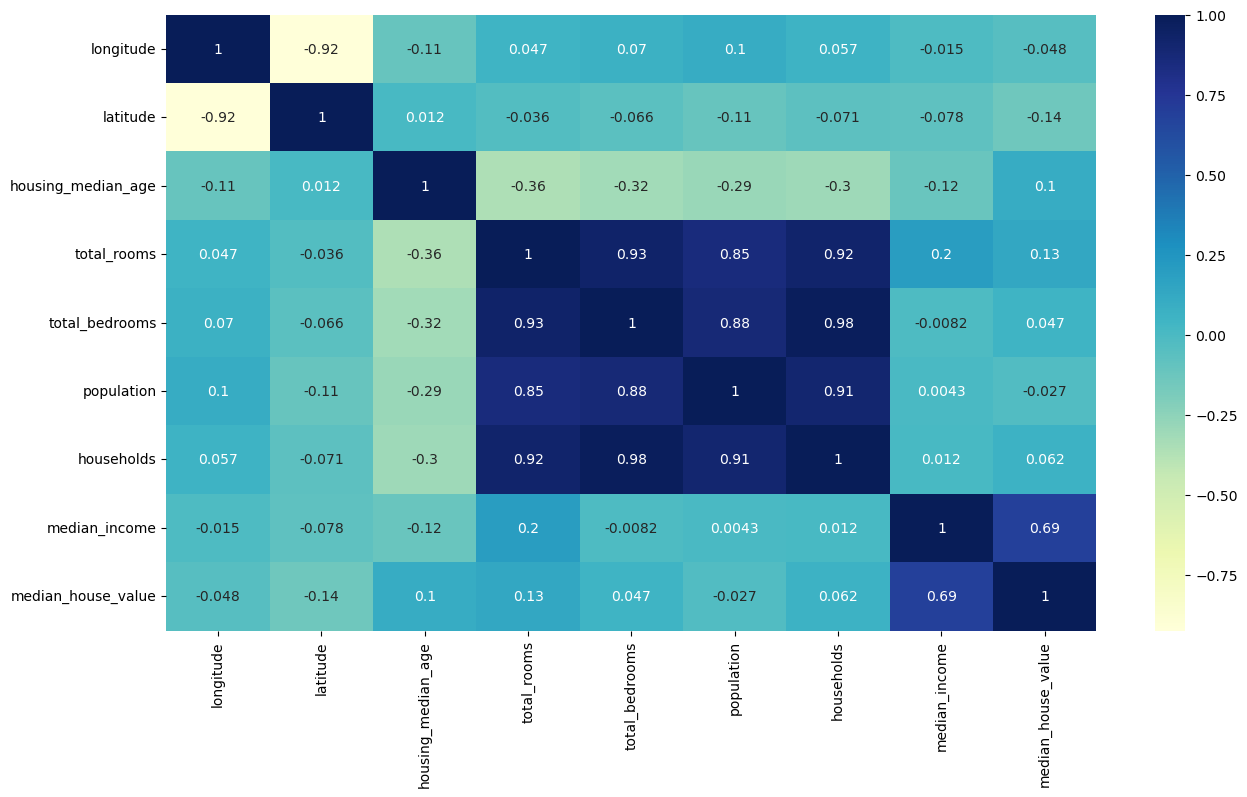

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [52]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

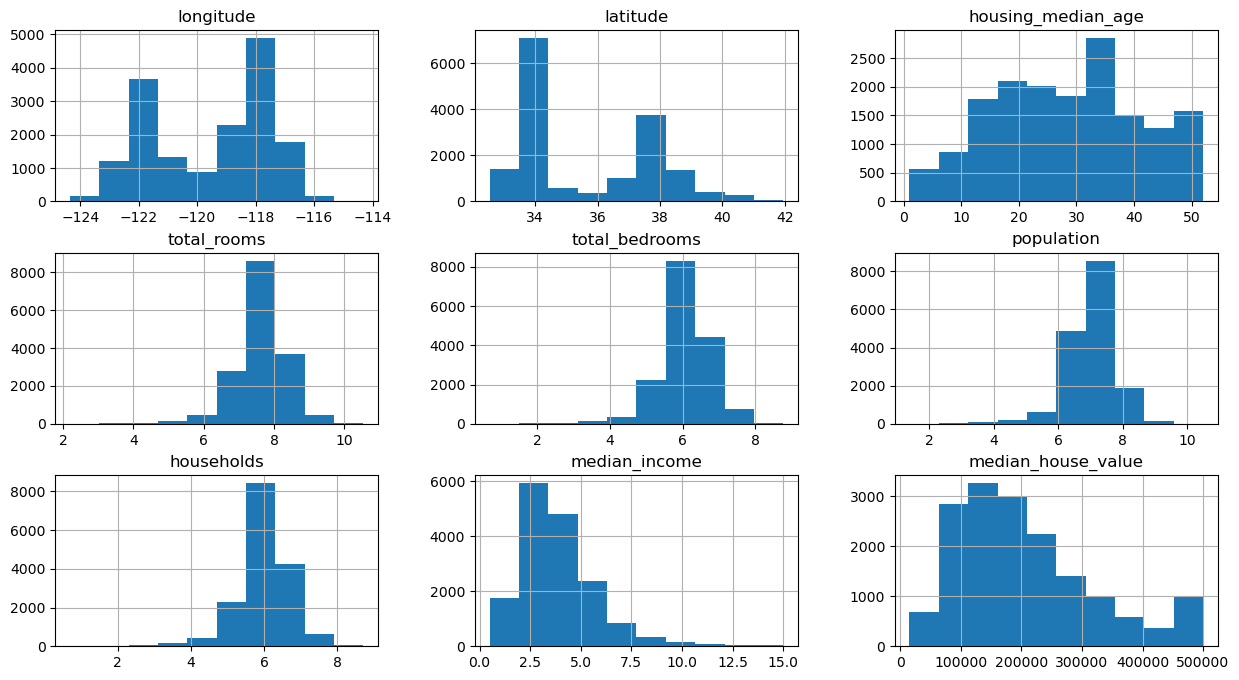

In [53]:
train_data.hist(figsize=(15,8))

In [54]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

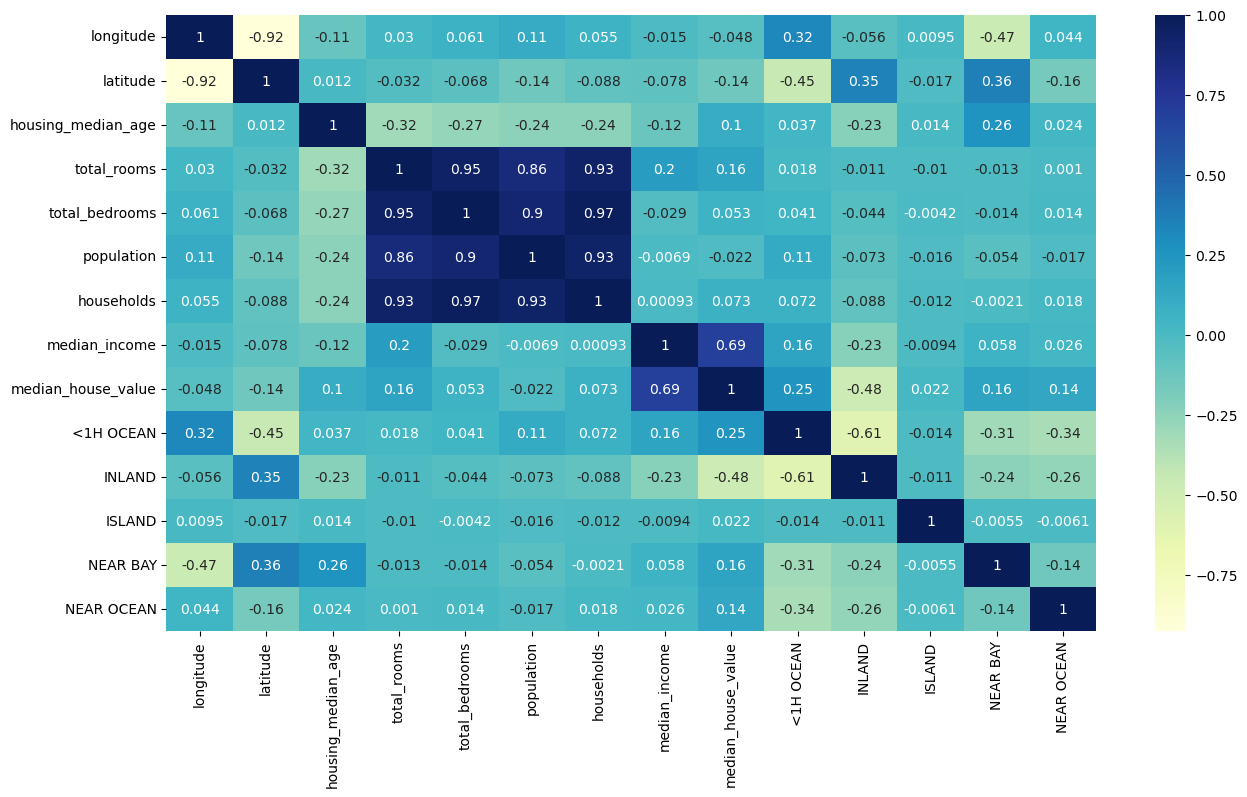

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

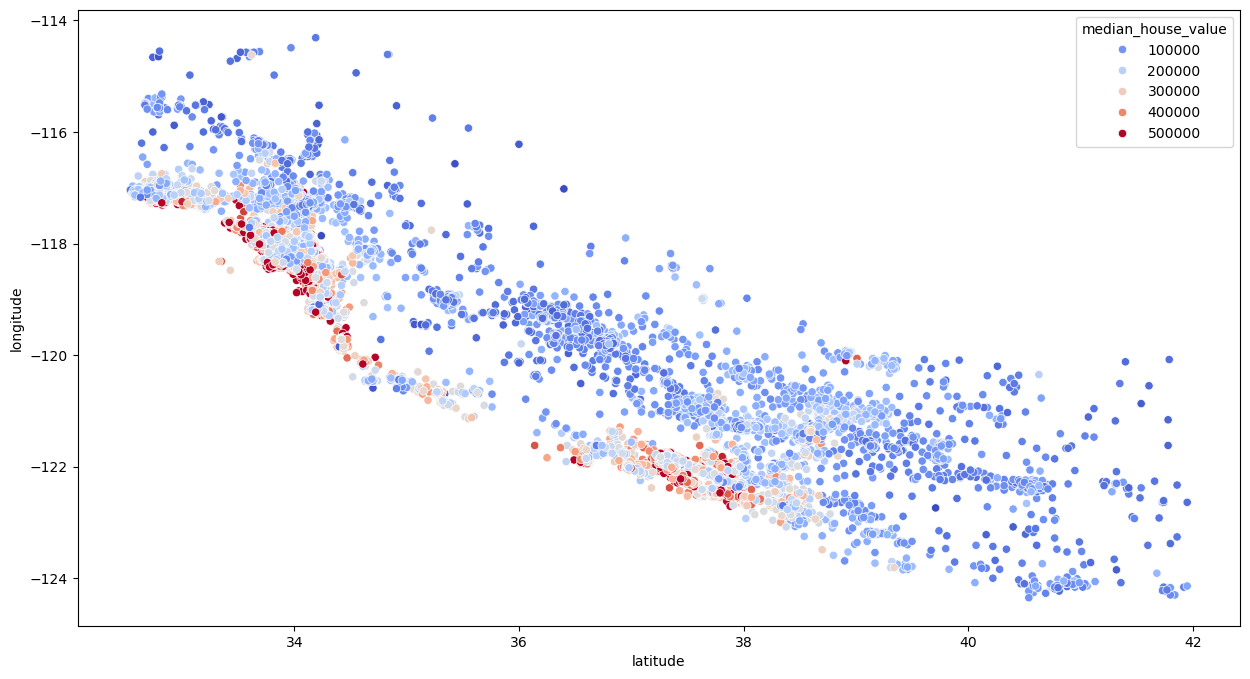

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y='longitude',data=train_data, hue='median_house_value',palette='coolwarm')

In [57]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

In [58]:
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
                                   
reg = LinearRegression()
reg2 = LinearRegression()

reg.fit(X_train,y_train)
reg2.fit(X_train_s,y_train)

LinearRegression()

In [60]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [61]:
X_test_s = scaler.transform(X_test)

In [62]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12454,-114.59,33.61,34.0,8.474286,7.069874,8.050384,6.963190,2.1782,58400.0,False,True,False,False,False,0.834274,1.217012
5668,-118.30,33.72,28.0,7.828436,6.369901,7.236339,6.318968,3.3397,267800.0,False,False,False,False,True,0.813688,1.238879
4313,-118.33,34.09,36.0,6.331502,5.198497,5.831882,4.852030,1.4375,165000.0,True,False,False,False,False,0.821053,1.304918
16325,-121.33,37.98,10.0,7.355641,5.986452,6.467699,5.852202,2.7031,150000.0,False,True,False,False,False,0.813859,1.256901
4700,-118.38,34.07,21.0,8.203578,6.863803,7.320527,6.792344,3.5573,500001.0,True,False,False,False,False,0.836684,1.207768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,-121.62,36.74,30.0,7.198931,5.537334,6.732211,5.513429,5.0374,165400.0,True,False,False,False,False,0.769188,1.305709
4105,-118.34,34.12,41.0,8.088869,6.522093,7.121252,6.459904,4.2415,409600.0,True,False,False,False,False,0.806305,1.252165
16863,-122.41,37.63,35.0,6.763885,5.424950,6.401917,5.384495,3.0000,229100.0,False,False,False,False,True,0.802046,1.256178
8273,-118.16,33.77,29.0,8.032360,6.668228,7.286876,6.602588,2.8750,232500.0,False,False,False,False,True,0.830170,1.216547


In [63]:
reg.score(X_test,y_test)

0.6786955764050491

In [64]:
reg2.score(X_test_s,y_test)

0.6786955764050492

Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
forest.score(X_test,y_test)

0.8220584310518593

In [35]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,5,10],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=3, scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [3, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=10)

In [37]:
best_forest = grid_search.best_estimator_

In [38]:
best_forest.score(X_test,y_test)

0.7981003506605735